In [3]:
#pip install pandas_profiling
import pandas as pd
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [4]:
data = pd.read_excel("data/Programas activos - rescindidos 2018-2022.xlsx")
data.drop(data[data["VALOR CUOTA"]>4500000].index, inplace=True)
data.drop(data[data["VALOR CUOTA"].isna()].index,inplace=True)
data.shape


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
data.head(2)

,PROGRAMA,DOCUMENTO TOMADOR,PLAN EXEQUIAL,TIPO PLAN,GENERO TOMADOR,EDAD TOMADOR,SUCURSAL VENTA,SUCURSAL ADM,LOCALIDAD PROGRAMA,FECHA SOLICITUD Año,...,FECHA_RESCINDIDO - Mes,FECHA_RESCINDIDO - Día,FECHA DE RESCINDIDO,VALOR CUOTA,BARRIO PROGRAMA,MOTIVO,TIPO MOTIVO,DÍA DE PAGO MENSUAL,CANTIDAD INSCRITOS,CANTIDAD MASCOTAS
0,98333,35329195,aurora Plus Mas,FAMILIAR,Femenino,63.0,Manizales,Manizales,Soacha,2021.0,...,junio,28.0,28 junio 2021,44500.0,Barrio No Identificado,Venta No Efectiva,Irreal,3.0,16.0,0.0
1,154303,1002652054,Aurora Plus 2020,FAMILIAR,Femenino,37.0,Manizales,Manizales,Manizales,2022.0,...,NaN,NaN,,40600.0,Fátima,Activo para verificación,Voluntario,14.0,15.0,0.0


In [ ]:
data.isna().sum()/data.shape[0]*100

PROGRAMA                   0.000000
DOCUMENTO TOMADOR          0.000000
PLAN EXEQUIAL              0.000000
TIPO PLAN                  0.000000
GENERO TOMADOR             0.000000
EDAD TOMADOR               0.000000
SUCURSAL VENTA             0.000000
SUCURSAL ADM               0.000000
LOCALIDAD PROGRAMA         4.512750
FECHA SOLICITUD Año        0.000000
FECHA SOLICITUD  Mes       0.000000
FECHA SOLICITUD  Día       0.000000
FECHA DE VENTA             0.000000
ESTADO                     0.000000
FECHA RESCINDIDO Año      42.300915
FECHA_RESCINDIDO - Mes    42.300915
FECHA_RESCINDIDO - Día    42.300915
FECHA DE RESCINDIDO        0.000000
VALOR CUOTA                0.000000
BARRIO PROGRAMA           25.086878
MOTIVO                     0.000000
TIPO MOTIVO                0.000000
DÍA DE PAGO MENSUAL        0.000000
CANTIDAD INSCRITOS         0.000000
CANTIDAD MASCOTAS          0.000000
dtype: float64

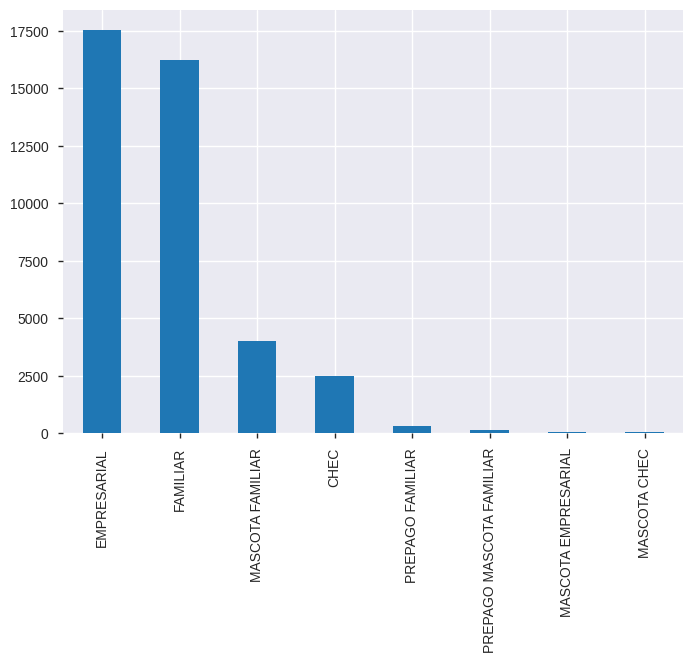

In [ ]:
data['TIPO PLAN'].value_counts().plot(kind='bar')

In [ ]:
planes= data["TIPO PLAN"].unique()

In [ ]:
for plan in planes:
  fig = px.histogram(data[data["TIPO PLAN"] == plan]["VALOR CUOTA"], title=plan)
  fig.show()


In [ ]:
for plan in planes:
  fig = px.histogram(data[data["TIPO PLAN"] == plan]["CANTIDAD INSCRITOS"], title=plan)
  fig.show()


In [ ]:
fig = px.histogram(data, x="VALOR CUOTA", color="ESTADO")
fig.show()

In [ ]:
exequial= data["PLAN EXEQUIAL"].unique()

In [ ]:
exequial

array(['aurora Plus Mas', 'Aurora Plus 2020',
       'Remanso Clasico Descuento 30%', 'Aurora Plus Mas 2020',
       'Aurora empresarial', 'Aurora de Oro grupo empresarial MGO',
       'Diamante Coopsocial', 'Aurora De Oro Empresarial',
       'Cooperativa De Empleados Confa', 'Aurora Plus',
       'Chec Plus (Facturación Urbana Chec)',
       'Caficultores Manizales titular y ocho',
       'Elite Ministerio de Defensa', 'Elite del INPEC',
       'Remanso Clasico Empresarial', 'Elite Inpec',
       'Elite Empresarial Plus', 'Previsión Boyacá',
       'Plan Navidad Maval Base (Facturación Urbana Chec)',
       'Cooperativa De Empleados De CONFA', 'CHEC Plus',
       'Grupo San Vicente Chiquinquira', 'Marcela Parra Silva',
       'Caficultores Manizales Pago Anual',
       'Heroes de Honor estamos Contigo', 'Plan Navidad Maval Base',
       'Municipio De Manizales', 'Plan Oro Empresarial',
       'Compania Manufacturera Andina S.A', 'aurora de Oro Coopsocial',
       'Maval Plus Promotor

In [ ]:
data["MOTIVO"]


In [ ]:
motivo= data["MOTIVO"].unique()
motivo

array(['Venta No Efectiva', 'Activo para verificación', 'Rescindido',
       'Activo', 'Incumplimiento en los Pagos', 'Cambio de programa',
       'Influencia de seres cercanos', 'Cliente de Alto Riesgo',
       'Desvinculación de la empresa', 'Experimentación',
       'Incumplimiento en compromiso de pago',
       'Programa con inconsistencia', 'Problemas económicos',
       'Dificultad para ubicarlo', 'Terminación y Uso del Contrato',
       'Inactivo rescindido', 'Inactivo para Reactivación',
       'No Interesado', 'Terminacion Tiempo Proteccion',
       'No aceptaron libranza', 'Costo del programa',
       'Doblemente Afiliado en la Aurora', 'Recuperado',
       'Fallecimiento del titular',
       'Cambio de programa- inscritos pasan a plan nuevo Aurora',
       'Cambio de lugar de vivienda', 'Costo adicional por traslados',
       'Costo adicional por mayores de 75 años',
       'No Da Motivos de Retiro', 'Mala venta', 'Pendiente de Activacion',
       'Mala atención en el servic

In [ ]:
tipo= data["TIPO MOTIVO"].unique()


array(['Irreal', 'Voluntario', 'Involuntario'], dtype=object)

In [ ]:
for plan in exequial:
  fig = px.histogram(data[data["PLAN EXEQUIAL"] == plan]["VALOR CUOTA"], title=plan)
  fig.show()


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EDAD TOMADOR,41160.0,93.162536,9.450156e+03,0.0,35.0,46.0,57.0,1.917285e+06
FECHA SOLICITUD Año,41159.0,2019.428873,1.430217e+00,2018.0,2018.0,2019.0,2021.0,2.022000e+03
FECHA SOLICITUD Día,41159.0,14.833597,9.548072e+00,1.0,6.0,15.0,23.0,3.100000e+01
FECHA RESCINDIDO Año,23622.0,2020.058970,1.190483e+00,2018.0,2019.0,2020.0,2021.0,2.023000e+03
FECHA_RESCINDIDO - Día,23622.0,18.854500,1.024802e+01,1.0,10.0,20.0,29.0,3.100000e+01
VALOR CUOTA,40863.0,53358.124404,5.393902e+06,-62500.0,8500.0,14100.0,18600.0,1.090187e+09
DÍA DE PAGO MENSUAL,41159.0,10.886513,9.816642e+00,1.0,1.0,10.0,19.0,3.100000e+01
CANTIDAD INSCRITOS,41160.0,10.033528,1.017777e+03,0.0,3.0,6.0,7.0,2.064900e+05
CANTIDAD MASCOTAS,41160.0,0.351701,3.567883e+01,0.0,0.0,0.0,0.0,7.238000e+03


In [ ]:
tipo

array(['Irreal', 'Voluntario', 'Involuntario'], dtype=object)

In [ ]:
data[data["TIPO MOTIVO"] == "Voluntario"]["MOTIVO"].unique()

array(['Activo para verificación', 'Rescindido', 'Activo',
       'Incumplimiento en los Pagos', 'Influencia de seres cercanos',
       'Cliente de Alto Riesgo', 'Experimentación',
       'Incumplimiento en compromiso de pago',
       'Programa con inconsistencia', 'Dificultad para ubicarlo',
       'Inactivo rescindido', 'Inactivo para Reactivación',
       'No Interesado', 'Terminacion Tiempo Proteccion',
       'Costo del programa', 'Recuperado',
       'Costo adicional por traslados',
       'Costo adicional por mayores de 75 años',
       'No Da Motivos de Retiro', 'Mala venta',
       'Mala atención en el servicio', 'PENDIENTE DEFINIR RETIRO',
       'Costo adicional por vinculación de beneficiarios mayores de 75 años',
       'Mala atencion en el servicio', 'Inconformidad en el Recaudo',
       'Percepción negativa de la empresa por comentarios de un tercero',
       'Programa pendiente de activación por empresa',
       'Ubicación de Oficinas', 'Precio del Plan',
       'Mala a

# Inicio CLM